# TP3 METODOS NUMERICOS 
## Cuadrados Minimos

In [1]:
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- pybind11 v2.6.2 dev1
-- Found PythonInterp: /home/duerunner/Documents/TP/TP3-MetNum/newenv/bin/python (found version "3.6.9") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
CMAKE_INSTALL_PREFIX=/home/duerunner/Documents/TP/TP3-MetNum
-- Configuring done


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import metnum

/home/duerunner/Documents/TP/TP3-MetNum/notebooks
Python 3.6.9


## Exploración de Datos 
Veamos primero como se distribuye el dataset en cuestión

In [3]:
# Carguemos el dataset 
df_train = pd.read_csv("../data/train.csv")
# Veamos el tamaño y sus primeras filas
display("Dimensiones: ", df_train.shape) 
pd.set_option("display.max.columns", None)
df_train.head(5)

'Dimensiones: '

(240000, 23)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,2.0,80.0,80.0,23533.0,NaN,NaN,2015-08-23 00:00:00,0.0,0.0,0.0,0.0,0.0,2273000.0
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,2.0,268.0,180.0,24514.0,19.310205,-99.227655,2013-06-28 00:00:00,0.0,0.0,0.0,1.0,1.0,3600000.0
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,2.0,144.0,166.0,48551.0,NaN,NaN,2015-10-17 00:00:00,0.0,0.0,0.0,0.0,0.0,1200000.0
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,1.0,63.0,67.0,53666.0,19.301890,-99.688015,2012-03-09 00:00:00,0.0,0.0,0.0,1.0,1.0,650000.0
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,1.0,95.0,95.0,47835.0,NaN,NaN,2016-06-07 00:00:00,0.0,0.0,0.0,0.0,0.0,1150000.0


In [4]:
#Veamos ademas las columnas 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          240000 non-null  int64  
 1   titulo                      234613 non-null  object 
 2   descripcion                 238381 non-null  object 
 3   tipodepropiedad             239954 non-null  object 
 4   direccion                   186928 non-null  object 
 5   ciudad                      239628 non-null  object 
 6   provincia                   239845 non-null  object 
 7   antiguedad                  196445 non-null  float64
 8   habitaciones                217529 non-null  float64
 9   garages                     202235 non-null  float64
 10  banos                       213779 non-null  float64
 11  metroscubiertos             222600 non-null  float64
 12  metrostotales               188533 non-null  float64
 13  idzona        

In [5]:
# Veamos alguinas estadisticas basicas del dataset de tipo numerico 
display(df_train.describe())
# y para los estrings tambien
display(df_train.describe(include=np.object))

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,fecha
count,234613,238381,239954,186928,239628,239845,240000
unique,186191,232187,24,140269,875,32,1830
top,casa en venta,empresa dedicada a los ante notario y regist...,Casa,-,Querétaro,Distrito Federal,2016-12-03 00:00:00
freq,468,119,141717,660,12646,58790,1416


In [6]:
# Veamos que sucede si eliminamos todas las filas que tengan algun valor incompleto 
df_train.dropna().shape

(49881, 23)

Podemos apreciar que el dataset pasa de tener 240mil columnas a apenas casi 50mil según este criterio, lo cual es un perdida de casi el 80% de los datos. Ante esto en algunos caso sera razonable limpiar solo los campos imcompletos de la variable que se va a utilizar en el experimento para evitar perder demasiada información.

In [7]:
# Por ejemplo limpiemos los campos incompletos del dataset df_train para mtros totales
df_train.dropna(subset=['metroscubiertos'], inplace=True)
df_train.shape

(222600, 23)

Veamos que en este caso se pierde menos de un 10% del dataset al limpiarlo y aun nos quedan mas de 222mil anuncios para utilizar en nuesta regresión. 

## K-Fold Cross Validation
A la hora de realizar los experimentos al igual que en el tp anterior se debe usar cross-validation para evitar overfitting y obtener resultados estadisticamente mas robustos.

## Metricas
Se utilizan las funciones provistas por sklearn
###  RMSE 
- La raíz del error cuadrático medio 
###  RMSLE 
- Error logarítmico cuadrático medio

### R^2
- Es la proporcion de la varianza en la variable dependiente que es predecible desde las variables independientes.
- (Solo la usamos cuando sea necesario)

In [8]:
# Importamos las funciones necesarias desde otro archivo nuestro paa hacer el notebook mas legible
from extra_scripts import cross_validate, rmse, rmsle

## Correlacion de las Variables
Veamos en un heatmap que tan correlacionada esta cada variable del dataset

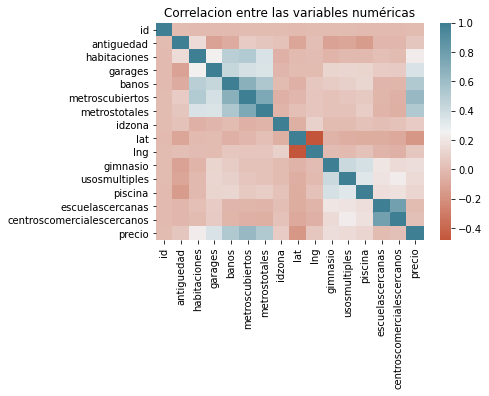

In [9]:
palette = sns.diverging_palette(20, 220, n=256)
ax=sns.heatmap(df_train.corr(), cmap=palette);
ax.set(title = "Correlacion entre las variables numéricas")
figure = ax.get_figure()    
figure.savefig('Preliminares/heatmap.png', dpi=400, bbox_inches="tight")

# Anális Preliminar: Prediccion de Precios por M^2
Nos interesa predecir los precios en base a los metros totales del inmueble. 

In [10]:
# Todos los datos son extraidos del conjunto de train ya que el de test no tiene los precios.
# Usamos un muestra de 30000 viviendas que no tengan datos faltantes, donde el 80 por ciento sera de training y el 20 de test
# En este caso como usamos menos de 50mil eventos podemos limpiar todo el dataset de datos faltantes.
total = 30000
cant_train = int((total / 100) * 80)
shuffle = df_train.sample(random_state=np.random.seed(1), frac=1).dropna()
new_train = shuffle.iloc[:cant_train, :]
new_test = shuffle.iloc[cant_train:total, :]

x_train, x_test = new_train["metroscubiertos"].values, new_test["metroscubiertos"].values
y_train, y_test = new_train["precio"].values, new_test["precio"].values

In [11]:
# Veamos el dataset que nos queda
train = new_train
display(train["metroscubiertos"].describe())

count    24000.000000
mean       157.997750
std         85.907717
min         16.000000
25%         87.000000
50%        140.000000
75%        210.000000
max        439.000000
Name: metroscubiertos, dtype: float64

In [12]:
train.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04
mean,150307.364000,8.783625,2.874333,1.660250,2.005625,157.997750,151.564167,2.455147e+06,20.644130,-100.287492,0.069708,0.078458,0.096500,0.672083,0.639583,2.204686e+06
std,86840.234994,9.260978,0.829098,0.756809,0.856421,85.907717,80.248633,1.063826e+07,2.805845,5.245183,0.254660,0.268897,0.295282,0.469464,0.480131,1.813235e+06
min,13.000000,0.000000,1.000000,0.000000,1.000000,16.000000,16.000000,2.300000e+01,-21.677988,-121.883836,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74882.000000,1.000000,2.000000,1.000000,1.000000,87.000000,90.000000,2.476300e+04,19.359194,-101.038909,0.000000,0.000000,0.000000,0.000000,0.000000,8.790000e+05
50%,150939.500000,5.000000,3.000000,2.000000,2.000000,140.000000,131.000000,5.568350e+04,19.540911,-99.241188,0.000000,0.000000,0.000000,1.000000,1.000000,1.660000e+06
75%,225625.500000,10.000000,3.000000,2.000000,3.000000,210.000000,197.000000,8.574675e+04,20.689190,-99.136855,0.000000,0.000000,0.000000,1.000000,1.000000,2.950000e+06
max,299991.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,41.689795,2.757929,1.000000,1.000000,1.000000,1.000000,1.000000,1.250000e+07


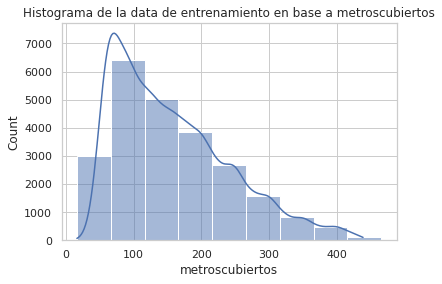

In [13]:
# Seteamso un grilla para visualizar mejor los datos
sns.set(style="whitegrid")
# Grafiquemos un histograma de la cantidad de metros cubiertos 
ax = sns.histplot(data=train, x="metroscubiertos",binwidth=50,kde=True)
ax.set_title("Histograma de la data de entrenamiento en base a metroscubiertos")
fig = ax.get_figure()
fig.savefig("Preliminares/Hist1.png")

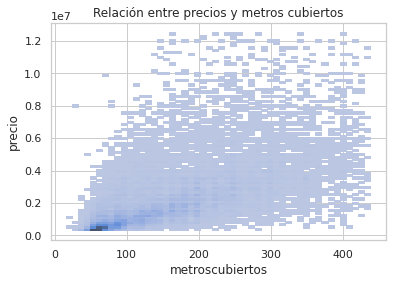

In [14]:
#Exploremos su relacion con los precios en la sigueinte grafica
ax = sns.histplot(train, x="metroscubiertos", y="precio")
ax.set_title("Relación entre precios y metros cubiertos")
fig = ax.get_figure()
fig.savefig("Preliminares/Hist2.png")

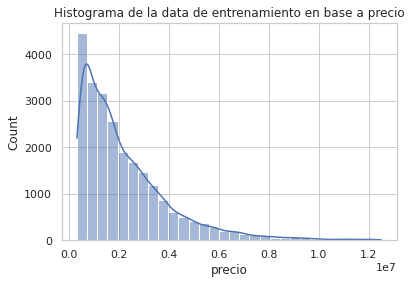

In [15]:
# Veamos ahora un histograma respecto a los precios
ax = sns.histplot(data=train, x="precio",bins=30,kde=True)
ax.set_title("Histograma de la data de entrenamiento en base a precio")
fig = ax.get_figure()
fig.savefig("Preliminares/Hist3.png")

In [16]:
# Ahora queremos entrenar el modelo utilizando nuestro metodo implementado
modelo = metnum.LinearRegression()
modelo.fit(x_train, y_train)
y_pred = modelo.predict(x_test)

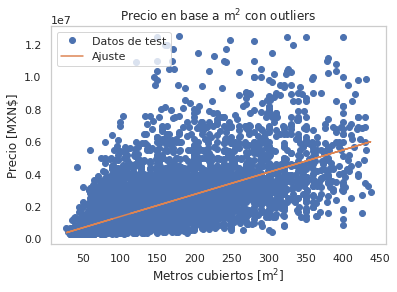

In [17]:
plt.figure("precio-metros-cubiertos")
plt.plot(x_test, y_test, "o", label="Datos de test")
plt.plot(x_test, y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ con outliers")
plt.savefig("Preliminares/Precio-en-funcion-de-m2-con-outliers.png")
plt.show()

In [18]:
# Metricas del conjunto de training
results = cross_validate(10, x_train, y_train, True)

RMSE = (1430086.1474489123, 49212.17602099811)
RMSLE = (0.5756724054461728, 0.011726672244300282)


In [19]:
# Metricas del fitting

print(f"RMSE = {rmse(y_test, y_pred)}")
print(f"RMSLE = {rmsle(y_test, y_pred)}")

RMSE = 1452480.9808117962
RMSLE = 0.5863680265179642


In [20]:
from extra_scripts import remove_outliers

#Removemos los outliers utilizando una funcion creada por nosotros
OF_new_train = remove_outliers(new_train, "precio", 2)
OF_new_test = remove_outliers(new_test, "precio", 2)

(22782, 23)
(5674, 23)


In [21]:
OF_x_train, OF_x_test = OF_new_train["metrostotales"].values, OF_new_test["metrostotales"].values
OF_y_train, OF_y_test = OF_new_train["precio"].values, OF_new_test["precio"].values

In [22]:
OF_modelo = metnum.LinearRegression()
OF_modelo.fit(OF_x_train, OF_y_train)
OF_y_pred = modelo.predict(OF_x_test)

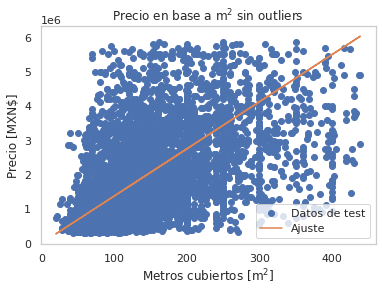

In [23]:
plt.figure("precio-metros-cubiertos")
plt.plot(OF_x_test, OF_y_test, "o", label="Datos de test")
plt.plot(OF_x_test, OF_y_pred, "-", label="Ajuste")
plt.grid()
plt.legend()
plt.xlabel(r"Metros cubiertos [$\mathrm{m}^2$]")
plt.ylabel("Precio [MXN$]")
plt.title("Precio en base a $\mathrm{m}^2$ sin outliers")
plt.savefig("Preliminares/Precio-en-funcion-de-m2-sin-outliers.png")
plt.show()

In [24]:
# Metricas del conjunto de training
OF_results = cross_validate(10, OF_x_train, OF_y_train, True)

RMSE = (1138868.4084657202, 24045.885248168517)
RMSLE = (0.6024376718518136, 0.010298695738714012)


In [25]:
# Metricas del fitting

print(f"RMSE = {rmse(OF_y_test, OF_y_pred)}")
print(f"RMSLE = {rmsle(OF_y_test, OF_y_pred)}")

RMSE = 1146382.826185807
RMSLE = 0.6262636695077799


In [26]:
#Muestro las diferencias entre los dos resultados en una tabla
WO_rmse = results["RMSE"]
WO_rmsle = results["RMSLE"]
OF_rmse = OF_results["RMSE"]
OF_rmsle = OF_results["RMSLE"]

print("With Outliers")
print(f" - RMSE = {(np.mean(WO_rmse), np.std(WO_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle), np.std(WO_rmsle))}")

print("No Outliers")
print(f" - RMSE = {(np.mean(OF_rmse), np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(OF_rmsle), np.std(OF_rmsle))}")

print("Differences")
print(f" - RMSE = {(np.mean(WO_rmse) - np.mean(OF_rmse), np.std(WO_rmse) - np.std(OF_rmse))}")
print(f" - RMSLE = {(np.mean(WO_rmsle) - np.mean(OF_rmsle), np.std(WO_rmsle) - np.std(OF_rmsle))}")


With Outliers
 - RMSE = (1430086.1474489123, 49212.17602099811)
 - RMSLE = (0.5756724054461728, 0.011726672244300282)
No Outliers
 - RMSE = (1138868.4084657202, 24045.885248168517)
 - RMSLE = (0.6024376718518136, 0.010298695738714012)
Differences
 - RMSE = (291217.738983192, 25166.29077282959)
 - RMSLE = (-0.02676526640564081, 0.00142797650558627)
